<a href="https://colab.research.google.com/github/Minayaterry/lab02-mt/blob/main/LAB_S05_MinayaT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 5: Modelos de Aprendizaje Automático
**Nombre:** Terry Minaya

### 1. Lectura y exploración de datos

In [4]:
import pandas as pd

# Cargar la data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data_raw = pd.read_csv(url, header=None)

# Visualizar primeras filas
data_raw.head()


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# Asignar nombres de columnas conocidos por la documentación del dataset
column_names = [
    'ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
    'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
    'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
]

data_raw.columns = column_names
data = data_raw.copy()

# Mostrar estructura con nombres
data.head()


,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
# Reemplazar los signos ? por valores nulos (NaN) y convertir Bare_Nuclei a numérico
data['Bare_Nuclei'].replace("?", pd.NA, inplace=True)
data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')

# Eliminar filas con valores nulos y la columna ID (no predictiva)
data.dropna(inplace=True)
data.drop('ID', axis=1, inplace=True)

# Confirmar la limpieza
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              683 non-null    int64  
 1   Uniformity_Cell_Size         683 non-null    int64  
 2   Uniformity_Cell_Shape        683 non-null    int64  
 3   Marginal_Adhesion            683 non-null    int64  
 4   Single_Epithelial_Cell_Size  683 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              683 non-null    int64  
 7   Normal_Nucleoli              683 non-null    int64  
 8   Mitoses                      683 non-null    int64  
 9   Class                        683 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 58.7 KB


<ipython-input-6-4a345b569bb8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bare_Nuclei'].replace("?", pd.NA, inplace=True)


### 2. Estadísticos descriptivos y correlación

In [7]:
# Estadísticas descriptivas
desc_stats = data.describe()

# Matriz de correlación
correlation_matrix = data.corr()

# Mostrar resultados
desc_stats, correlation_matrix


(       Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
 count       683.000000            683.000000             683.000000   
 mean          4.442167              3.150805               3.215227   
 std           2.820761              3.065145               2.988581   
 min           1.000000              1.000000               1.000000   
 25%           2.000000              1.000000               1.000000   
 50%           4.000000              1.000000               1.000000   
 75%           6.000000              5.000000               5.000000   
 max          10.000000             10.000000              10.000000   
 
        Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
 count         683.000000                   683.000000   683.000000   
 mean            2.830161                     3.234261     3.544656   
 std             2.864562                     2.223085     3.643857   
 min             1.000000                     1.000000     1.00000

### 3. Visualización de datos

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

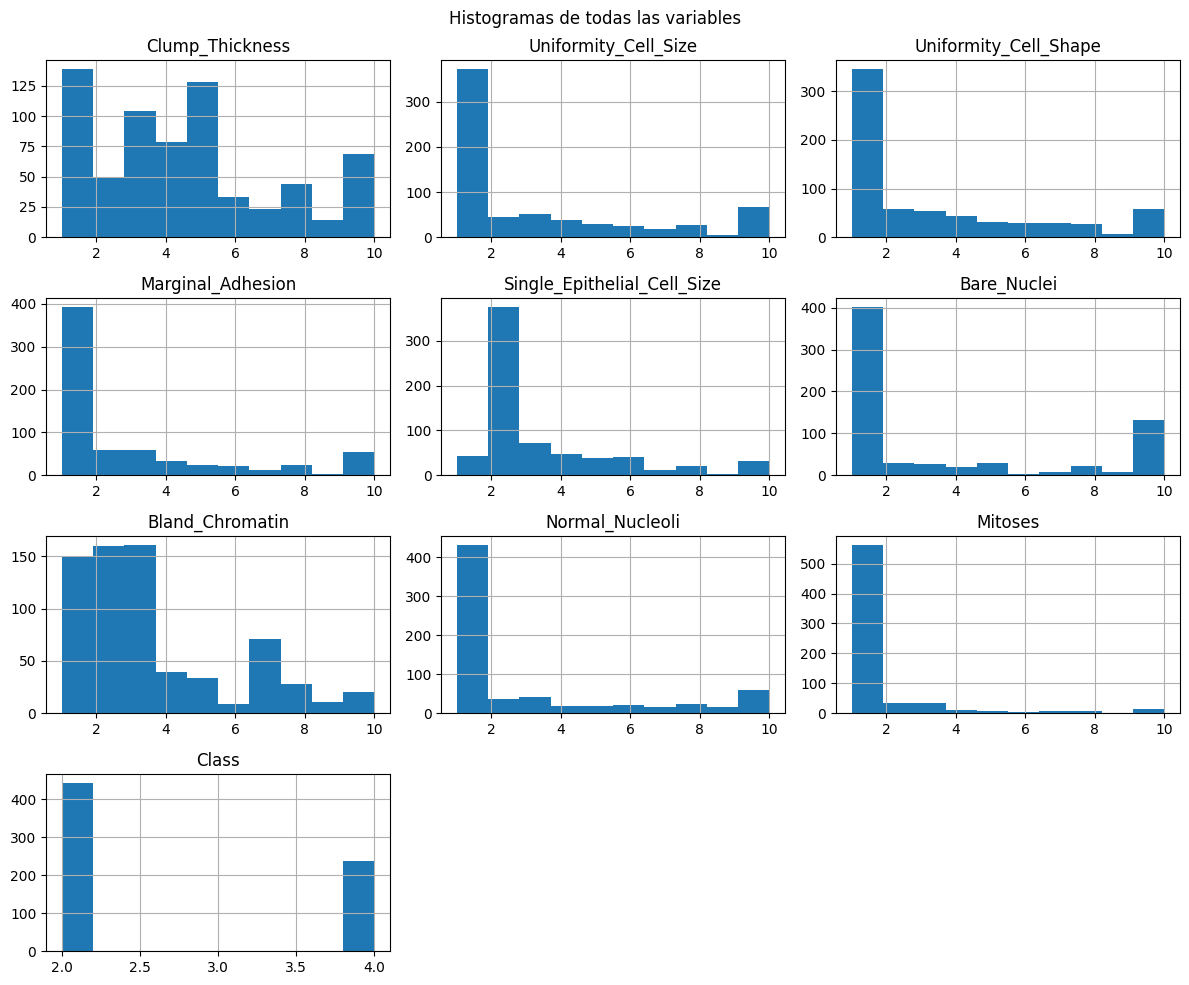

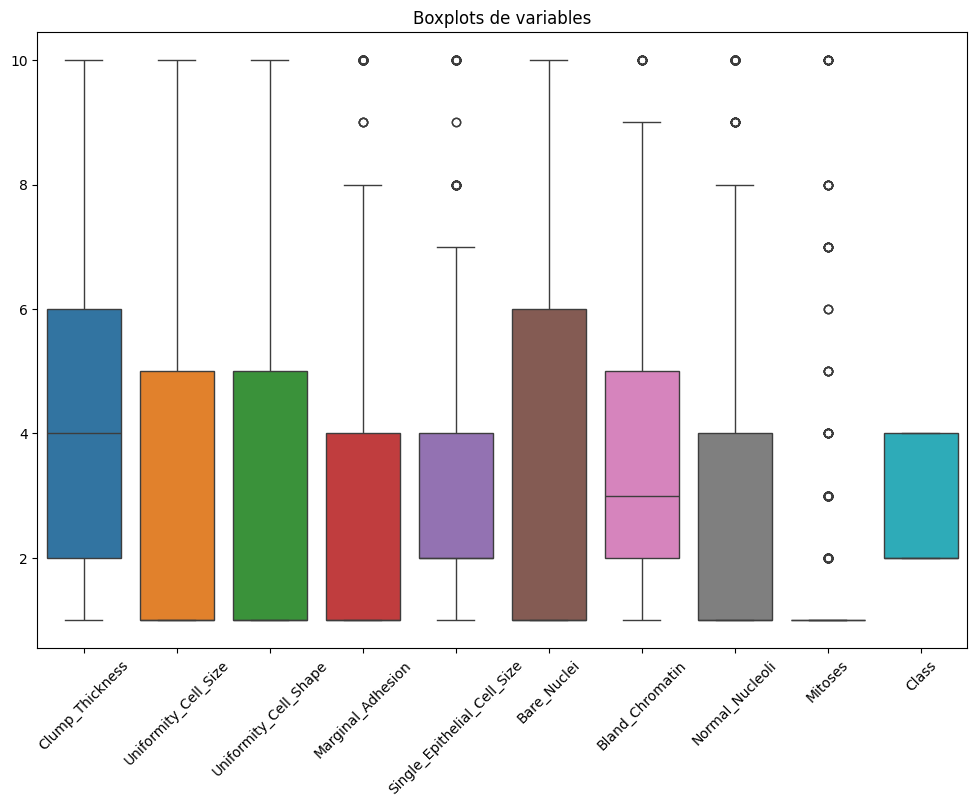

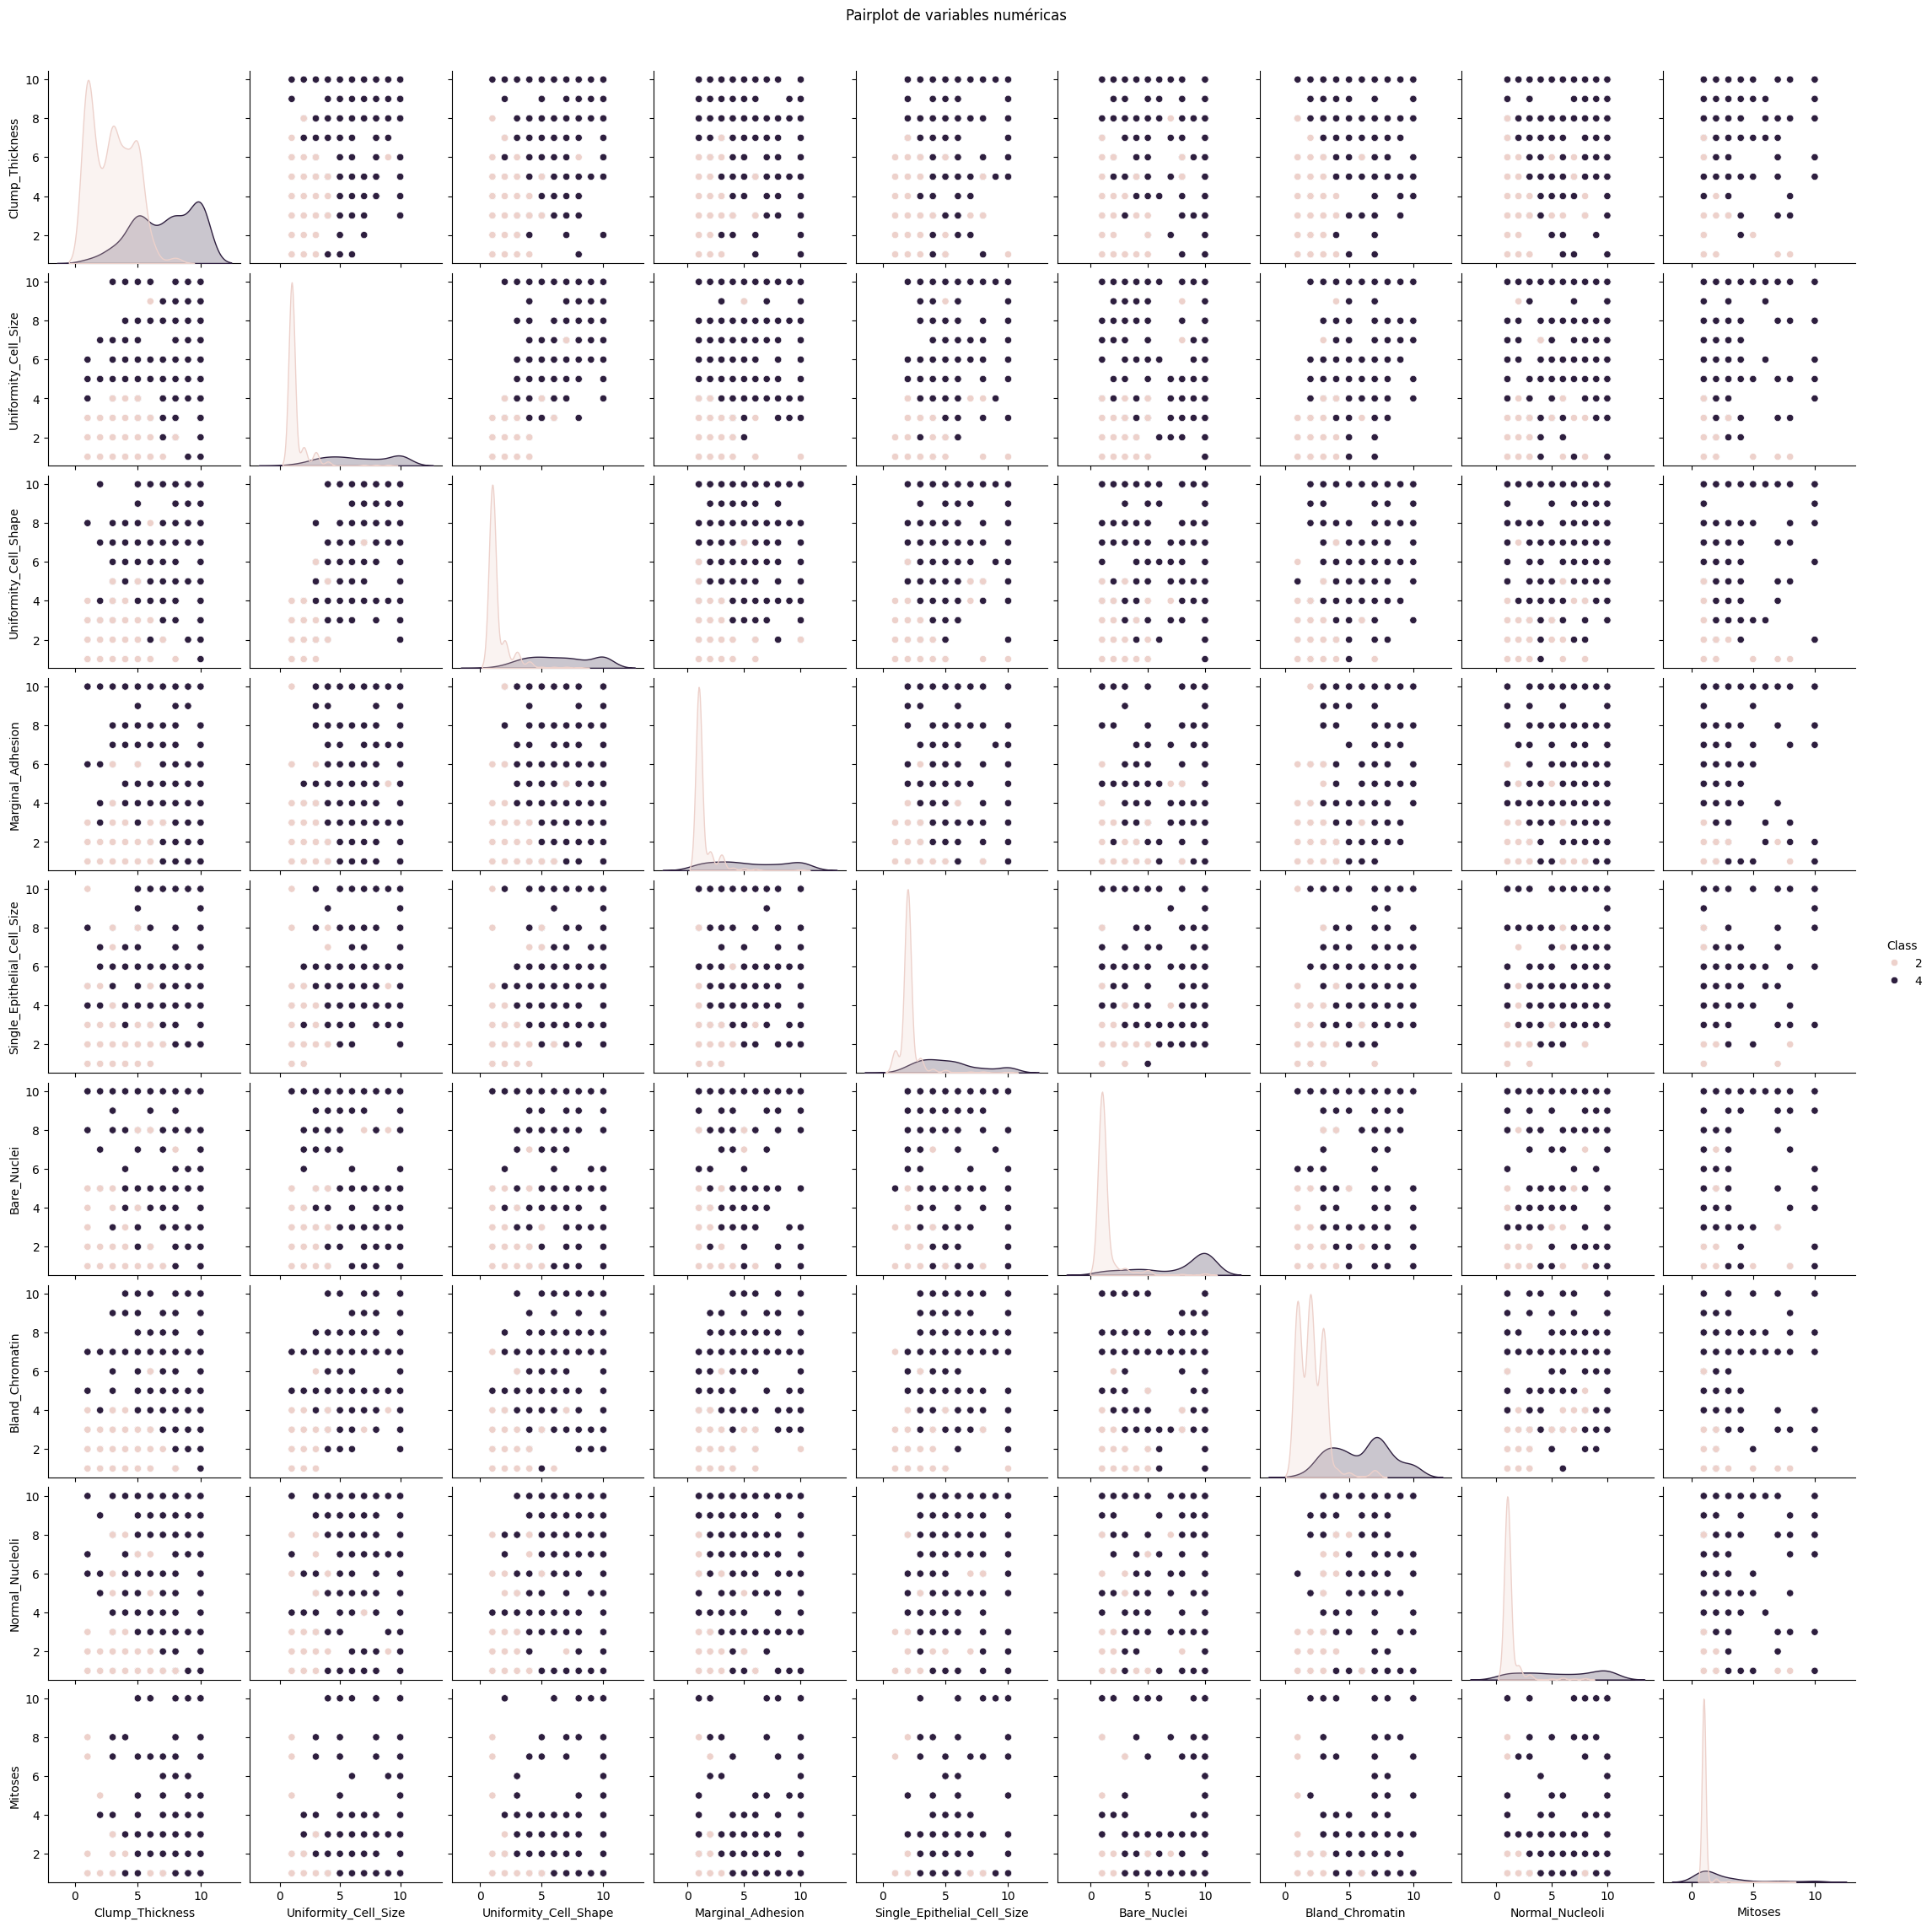

In [13]:
# Histogramas
data.hist(figsize=(12, 10))
plt.suptitle("Histogramas de todas las variables")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplots de variables")
plt.xticks(rotation=45)
plt.show()

# Diagramas de dispersión por pares (solo algunas variables para mayor claridad)
sns.pairplot(data, hue="Class", vars=data.columns[:-1])
plt.suptitle("Pairplot de variables numéricas", y=1.02)
plt.show()


### 4. Modelo k-NN con scikit-learn

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
# Separar variables predictoras y la variable objetivo
X = data.drop('Class', axis=1)
y = data['Class']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo k-NN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicciones
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Medir precisión
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en entrenamiento: {acc_train:.2f}")
print(f"Precisión en prueba: {acc_test:.2f}")



Precisión en entrenamiento: 0.98
Precisión en prueba: 0.96
